In [7]:
D <- read.csv("DST_BIL54.csv")
str(D)
# See the help
# ?strftime
D$time <- as.POSIXct(paste0(D$time,"-01"), "%Y-%m-%d", tz="UTC")
class(D$time)

## Year to month for each of them
D$year <- 1900 + as.POSIXlt(D$time)$year + as.POSIXlt(D$time)$mon / 12

## Make the output variable a floating point (i.e.\ decimal number)
D$total <- as.numeric(D$total) / 1E6

## Divide intro train and test set
teststart <- as.POSIXct("2024-01-01", tz="UTC")
Dtrain <- D[D$time < teststart, ]
Dtest <- D[D$time >= teststart, ]


'data.frame':	84 obs. of  13 variables:
 $ time        : chr  "2018-01" "2018-02" "2018-03" "2018-04" ...
 $ total       : int  2930483 2934044 2941422 2951498 2963093 2973721 2976096 2985537 2983209 2982473 ...
 $ gasoline    : int  1781826 1783338 1787219 1793554 1799795 1805170 1806338 1810615 1808496 1806710 ...
 $ diesel      : int  1136656 1138414 1141576 1144846 1149840 1154651 1155420 1159907 1159418 1160162 ...
 $ fgas        : int  12 12 12 12 12 12 12 12 11 11 ...
 $ ngas        : int  256 255 257 257 256 262 262 261 261 263 ...
 $ electricity : int  9304 9343 9399 9548 9665 9807 9853 10002 10120 10236 ...
 $ petroleum   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hydrogen    : int  81 80 77 77 77 77 77 80 82 82 ...
 $ methanol    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ethanol     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pluginhybrid: int  2340 2593 2873 3195 3439 3734 4126 4652 4812 5000 ...
 $ otherfuels  : int  8 9 9 9 9 8 8 8 9 9 ...


[1] "POSIXct" "POSIXt"

## 3.2


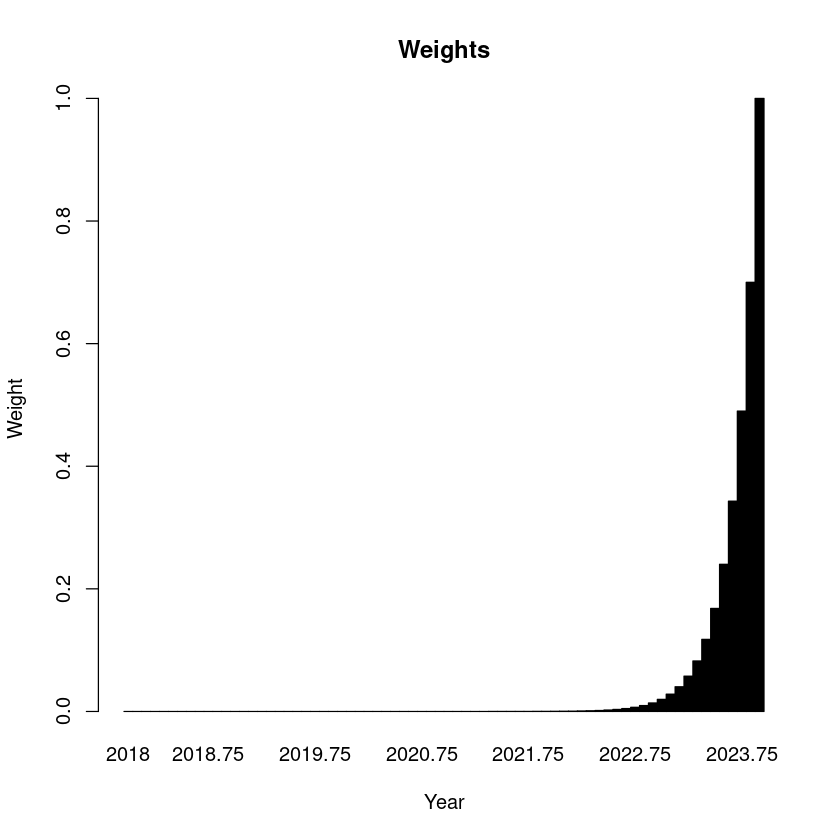

In [8]:
xx <- Dtrain$year # # Extracts it as a numeric vector
y <- Dtrain$total

N <-length((y))
lambda <- 0.7
w <- lambda^(N - (1:N))
par(bg = "white")
barplot(w, names.arg = xx, col = "black", border = "black", 
        xlab = "Year", ylab = "Weight", main = "Weights",
        space = 0)

## 3.3

In [9]:
sum(w)
length(y)


[1] 3.333333

[1] 72

2.4 because it is needed in the same plot

Warning message in sig2 * (1 + rowSums((x_future %*% solve(t(x) %*% x)) * x_future)):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”


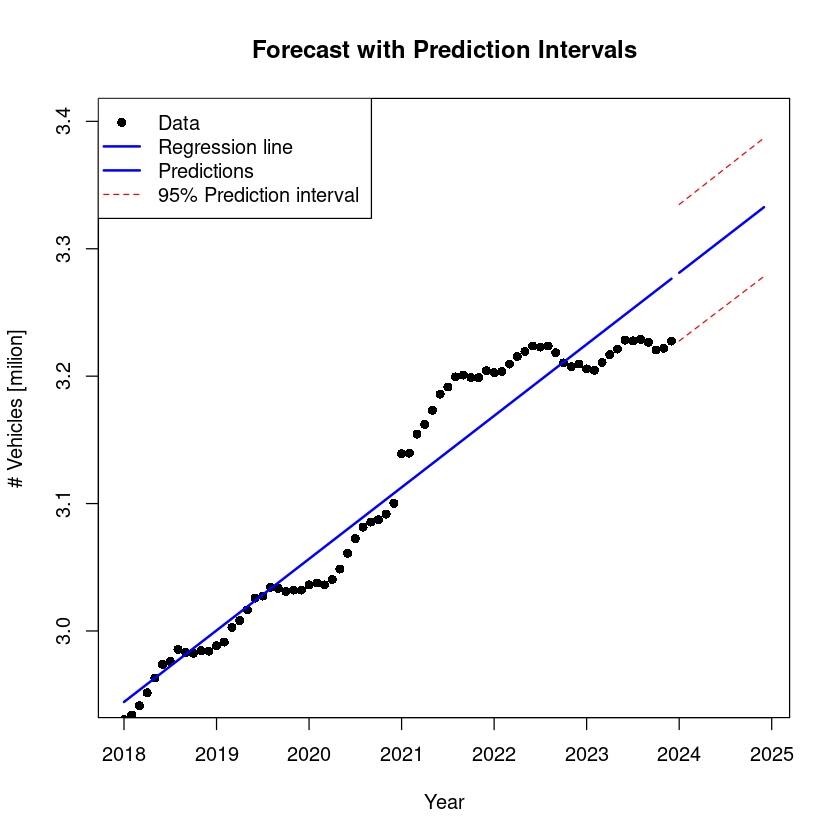

In [10]:
xx <- Dtrain$year # # Extracts it as a numeric vector
y <- Dtrain$total


x <-cbind(1,xx)
parameters <- solve(t(x)%*%x)%*%t(x)%*%y


# epsilon 
epsilon <- y -x%*%parameters

# An unbiased estimate of σ2 is from Theorem 3.4 (3.44)
N <- length(y) # number of observations
p <- length(parameters) # number of parameters?? 
sig2 <- t(epsilon)%*%epsilon/(N-p)


var_parameters <- as.numeric(sig2)*solve(t(x)%*%x)# does it make sense that this is a 2*2 matrix?


next12months = seq(xx[length(xx)]+1/12,xx[length(xx)]+1,1/12)

x_future=cbind(1,next12months)

predictions12months = x%*%parameters

# Predictions
predictions12months <- x_future %*% parameters

pred_se <- sqrt(sig2 * (1 + rowSums((x_future %*% solve(t(x) %*% x)) * x_future)))

# Compute upper bound of prediction interval
t_value <- qt(0.025, N - p)  # 95% confidence interval, so alpha/2 = 0.025
upperbound <- predictions12months + t_value * pred_se
lowerbound <- predictions12months - t_value * pred_se

par(bg = "white")

plot(xx, y, pch = 16, col = "black", xlab = "Year", ylab = "# Vehicles [milion]", main = "Forecast with Prediction Intervals",xlim = c(min(xx), max(next12months)),ylim = range(2.95,3.4, predictions12months))
lines(xx, parameters[1] + parameters[2] * xx, col = "blue", lwd = 2)  # Regression line
lines(next12months, predictions12months, col = "blue", lwd = 2)  # Future predictions
lines(next12months, upperbound, col = "red", lty = 2)  # Upper bound
lines(next12months, lowerbound, col = "red", lty = 2) 
legend("topleft", legend = c("Data", "Regression line", "Predictions", "95% Prediction interval"), col = c("black", "blue", "blue", "red"), lty = c(NA, 1, 1, 2), 
lwd = c(NA, 2, 2, 1),pch = c(16,NA,NA,NA)) 

## 3.4 og 3.5

Warning message in sig2_2 * (1 + rowSums((x_future_2 %*% solve(t(x_2) %*% solve(SIGMA_2) %*% :
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
”


,-15.739978669
xx_2,0.009370982


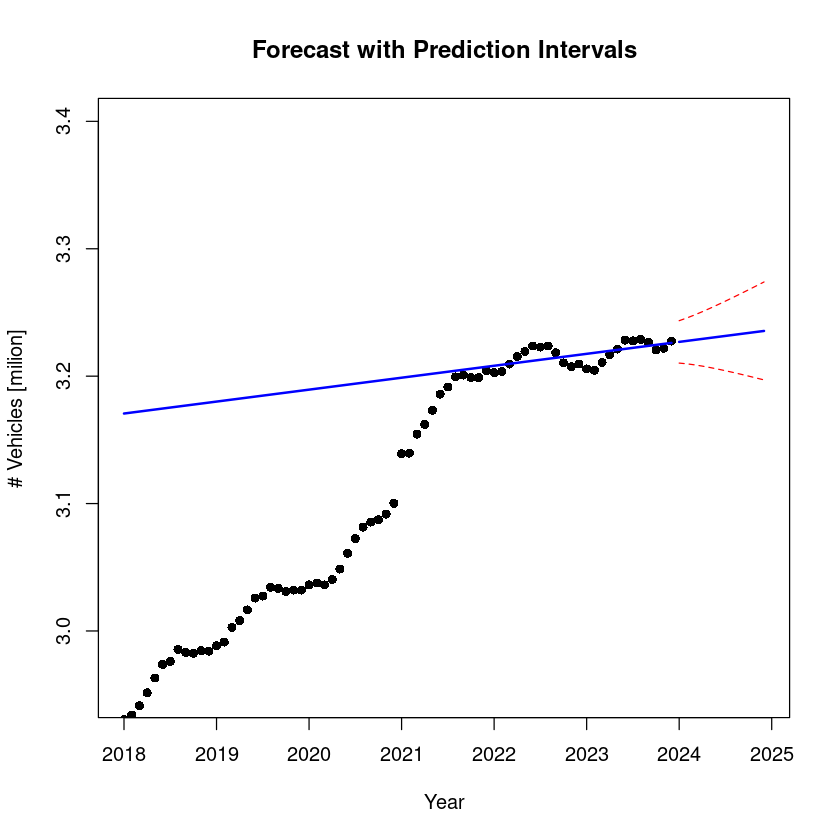

In [11]:
SIGMA_2 = diag(1/w)
xx_2 <- Dtrain$year # # Extracts it as a numeric vector
y_2 <- Dtrain$total

x_2 <- cbind(1, xx_2)
parameters_2 <- solve(t(x_2) %*% solve(SIGMA_2) %*% x_2) %*% t(x_2) %*% solve(SIGMA_2) %*% y_2

# epsilon 
epsilon_2 <- y_2 - x_2 %*% parameters_2

# An unbiased estimate of σ2 is from Theorem 3.4 (3.44)
N_2 <- length(y_2) # number of observations
p_2 <- length(parameters_2) # number of parameters?? 
T_2 <- sum(w)
sig2_2 <- t(epsilon_2) %*% solve(SIGMA_2) %*% epsilon_2 / (T_2 - p_2)

next12months_2 = seq(xx_2[length(xx_2)] + 1/12, xx_2[length(xx_2)] + 1, 1/12)

x_future_2 = cbind(1, next12months_2)

predictions12months_2 = x_2 %*% parameters_2

# Predictions
predictions12months_2 <- x_future_2 %*% parameters_2

pred_se_2 <- sqrt(sig2_2 * (1 + rowSums((x_future_2 %*% solve(t(x_2) %*% solve(SIGMA_2) %*% x_2)) * x_future_2)))

# Compute upper bound of prediction interval
t_value_2 <- qt(0.025, N_2 - p_2)  # 95% confidence interval, so alpha/2 = 0.025
upperbound_2 <- predictions12months_2 + t_value_2 * pred_se_2
lowerbound_2 <- predictions12months_2 - t_value_2 * pred_se_2

par(bg = "white")

plot(xx_2, y_2, pch = 16, col = "black", xlab = "Year", ylab = "# Vehicles [milion]", main = "Forecast with Prediction Intervals", xlim = c(min(xx_2), max(next12months_2)), ylim = range(2.95, 3.4, predictions12months_2))
lines(xx_2, parameters_2[1] + parameters_2[2] * xx_2, col = "blue", lwd = 2)  # Regression line
lines(next12months_2, predictions12months_2, col = "blue", lwd = 2)  # Future predictions
lines(next12months_2, upperbound_2, col = "red", lty = 2)  # Upper bound
lines(next12months_2, lowerbound_2, col = "red", lty = 2) 
parameters_2


In [ ]:
parameters

,-52.4828617
xx,0.0275299


Plot both


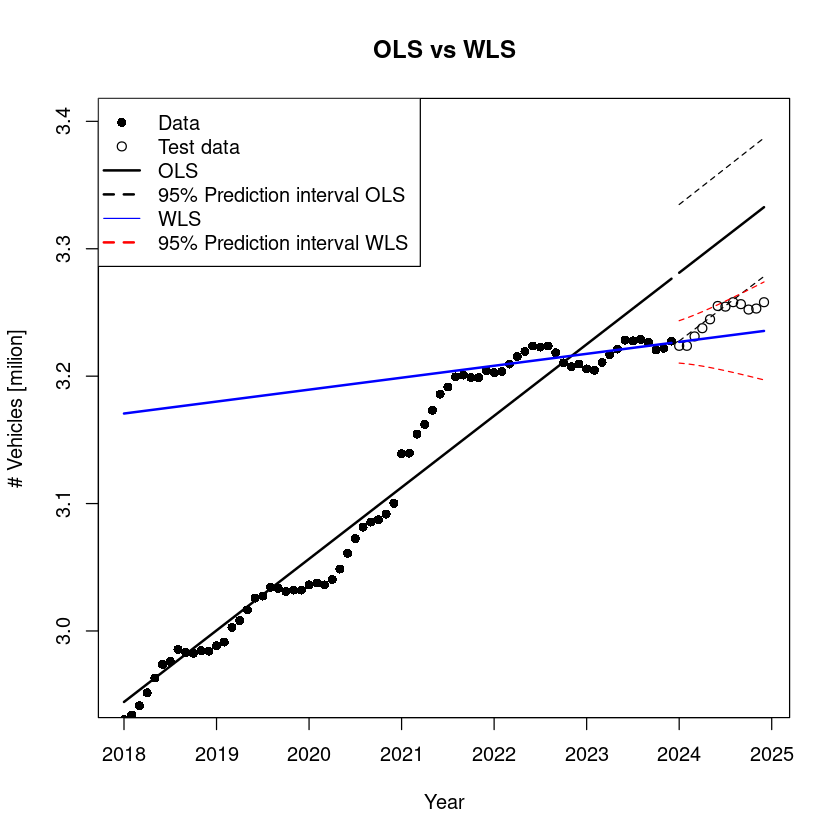

In [24]:
par(bg = "white")

#Data
plot(xx, y, pch = 16, col = "black", xlab = "Year", ylab = "# Vehicles [milion]",
 main = "OLS vs WLS",xlim = c(min(xx), max(next12months)),ylim = range(2.95,3.4, predictions12months))
points(Dtest$year, Dtest$total, pch = 1, col = "black")

#OLS
lines(xx, parameters[1] + parameters[2] * xx, col = "black", lwd = 2)  # Regression line
lines(next12months, predictions12months, col = "black", lwd = 2)  # Future predictions
lines(next12months, upperbound, col = "black", lty = 2)  # Upper bound
lines(next12months, lowerbound, col = "black", lty = 2) 

# WLS
lines(xx_2, parameters_2[1] + parameters_2[2] * xx_2, col = "blue", lwd = 2)  # Regression line
lines(next12months_2, predictions12months_2, col = "blue", lwd = 2)  # Future predictions
lines(next12months_2, upperbound_2, col = "red", lty = 2)  # Upper bound
lines(next12months_2, lowerbound_2, col = "red", lty = 2) 



legend("topleft", 
legend = c("Data", "Test data", "OLS", "95% Prediction interval OLS","WLS", "95% Prediction interval WLS"), 
col = c("black", "black", "black","black","blue","red"), lty = c(NA, NA,1, 2,1, 2), 
lwd = c(NA,NA, 2, 2, 1,2),pch = c(16,1,NA,NA,NA,NA)) 